In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv("C:/Users/aksha/Desktop/AR/Singapore/NUS_hands_on/project/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,AHD
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  AHD       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
AHD         0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


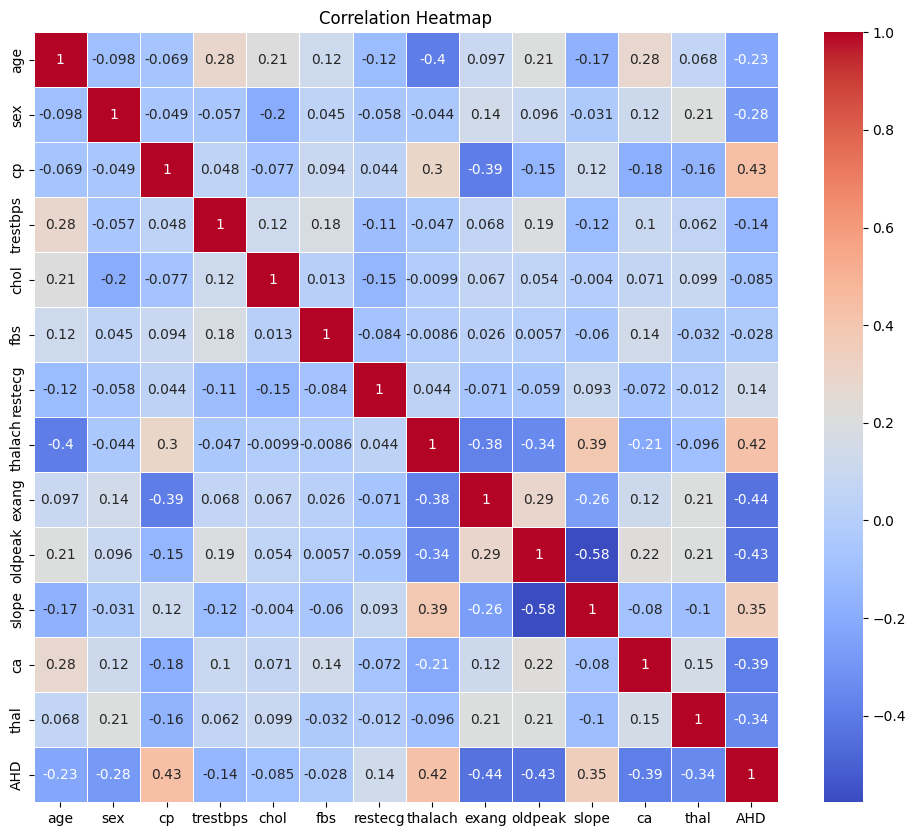

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

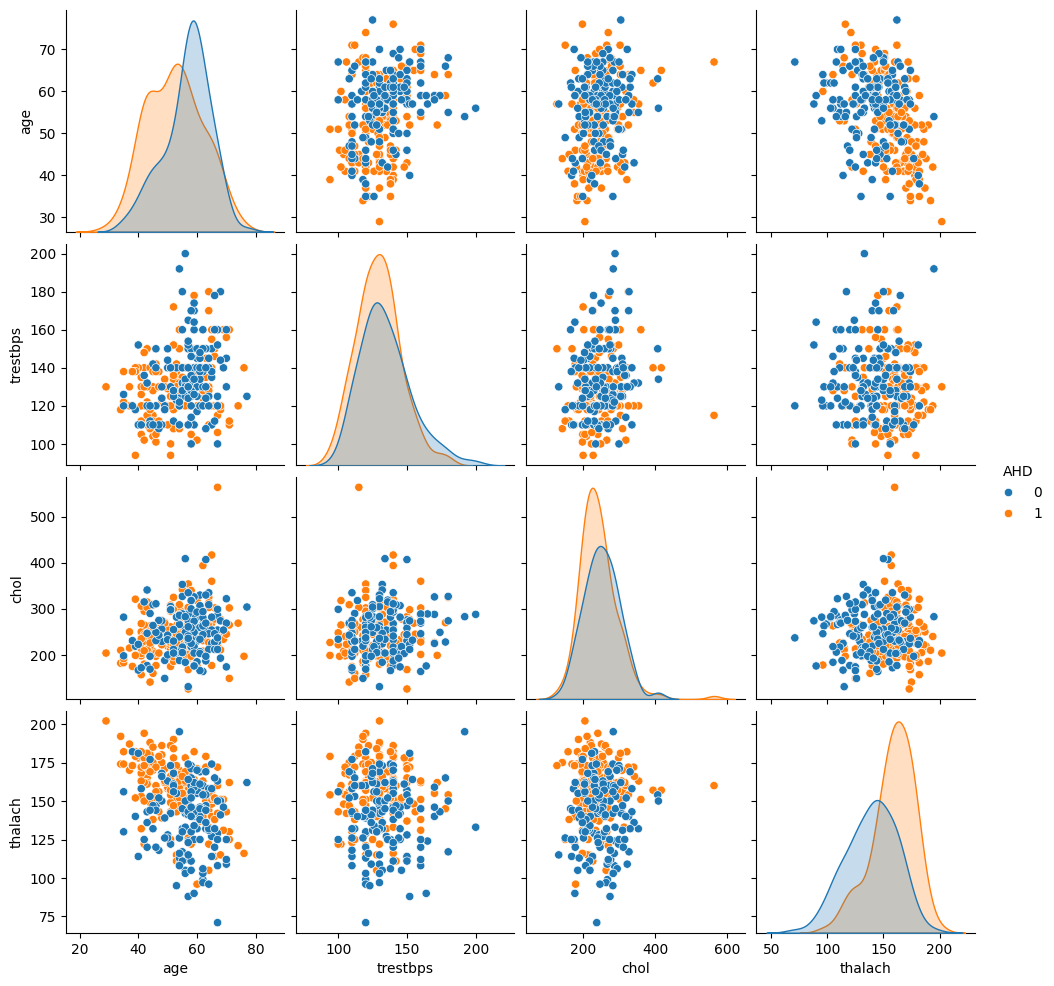

In [7]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'AHD']], hue='AHD')
plt.show()

In [8]:
X = df.drop('AHD', axis=1)
y = df['AHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [25]:
def train_model(X_train, y_train, epochs=5):
    dt_classifier = DecisionTreeClassifier(random_state=42)
    for _ in range(epochs):
        dt_classifier.fit(X_train, y_train)
    return dt_classifier

In [26]:
dt_classifier = train_model(X_train, y_train, epochs=5)
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [27]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

print("Regular Training Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision_0: {precision[0]:.4f}, Precision_1: {precision[1]:.4f}")
print(f"Recall_0: {recall[0]:.4f}, Recall_1: {recall[1]:.4f}")
print(f"F1_0: {f1[0]:.4f}, F1_1: {f1[1]:.4f}")


Regular Training Results:
Accuracy: 0.7213
Precision_0: 0.6296, Precision_1: 0.7941
Recall_0: 0.7083, Recall_1: 0.7297
F1_0: 0.6667, F1_1: 0.7606


In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        24
           1       0.79      0.73      0.76        37

    accuracy                           0.72        61
   macro avg       0.71      0.72      0.71        61
weighted avg       0.73      0.72      0.72        61



In [39]:
#Leave-One-Out Cross-Validation
loo = LeaveOneOut()
y_pred_loo = []
y_true_loo = []

In [40]:
for train_index, test_index in loo.split(X):
    X_train_loo, X_test_loo = X.iloc[train_index], X.iloc[test_index]
    y_train_loo, y_test_loo = y.iloc[train_index], y.iloc[test_index]
    
    dt_classifier_loo = train_model(X_train_loo, y_train_loo, epochs=5)
    y_pred_loo.append(dt_classifier_loo.predict(X_test_loo)[0])
    y_true_loo.append(y_test_loo.values[0])

In [41]:
# Calculate metrics for LOOCV
accuracy_loo = accuracy_score(y_true_loo, y_pred_loo)
precision_loo, recall_loo, f1_loo, _ = precision_recall_fscore_support(y_true_loo, y_pred_loo, average=None)

print("\nLeave-One-Out Cross-Validation Results:")
print(f"Accuracy: {accuracy_loo:.4f}")
print(f"Precision_0: {precision_loo[0]:.4f}, Precision_1: {precision_loo[1]:.4f}")
print(f"Recall_0: {recall_loo[0]:.4f}, Recall_1: {recall_loo[1]:.4f}")
print(f"F1_0: {f1_loo[0]:.4f}, F1_1: {f1_loo[1]:.4f}")



Leave-One-Out Cross-Validation Results:
Accuracy: 0.7987
Precision_0: 0.7810, Precision_1: 0.8133
Recall_0: 0.7754, Recall_1: 0.8182
F1_0: 0.7782, F1_1: 0.8157


In [43]:
original_samples = len(df)
target_samples = original_samples + 700
sampling_strategy = {0: target_samples // 2, 1: target_samples // 2}

# Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new dataframe with the augmented data
df_augmented = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                          pd.DataFrame(y_resampled, columns=['AHD'])], axis=1)

df_augmented = df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

df_augmented.to_csv('C:/Users/aksha/Desktop/AR/Singapore/NUS_hands_on/project/heart_augmented.csv', index=False)
df_augmented


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,AHD
0,59,1,2,139,185,0,0,155,0,2.890905,1,0,2,0
1,64,0,0,131,304,0,1,123,0,1.802010,1,1,2,1
2,42,0,1,120,208,0,1,173,0,0.000000,1,0,2,1
3,46,1,0,113,200,0,0,174,0,0.252437,2,1,2,0
4,56,1,1,125,260,0,0,141,0,0.355659,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,69,1,3,160,234,1,0,131,0,0.100000,1,1,2,1
998,46,1,0,120,249,0,0,144,0,0.800000,2,0,3,0
999,51,1,2,94,226,0,1,152,1,0.116937,1,0,2,1
1000,59,0,0,140,313,0,0,149,0,0.494748,1,1,2,0


In [44]:
df_augmented.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,AHD
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.00000
mean,54.412176,0.575848,0.765469,132.385230,245.786427,0.063872,0.333333,148.752495,0.224551,1.047000,1.252495,0.582834,2.153693,0.50000
std,8.161505,0.494460,0.868982,16.095038,48.611698,0.244647,0.480038,21.784583,0.417495,1.068484,0.592257,0.847883,0.598309,0.50025
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,49.000000,0.000000,0.000000,121.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.098966,1.000000,0.000000,2.000000,0.00000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,0.000000,152.000000,0.000000,0.758933,1.000000,0.000000,2.000000,0.50000
75%,60.000000,1.000000,1.000000,140.000000,275.000000,0.000000,1.000000,165.000000,0.000000,1.707964,2.000000,1.000000,3.000000,1.00000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.00000


In [45]:
Xd = df_augmented.drop('AHD', axis=1)
yd = df_augmented['AHD']
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.2, random_state=11)

In [46]:
def train_model(Xd_train, yd_train, epochs=5):
    dt_classifier = DecisionTreeClassifier(random_state=42)
    for _ in range(epochs):
        dt_classifier.fit(Xd_train, yd_train)
    return dt_classifier

In [47]:
dt_classifier = train_model(Xd_train, yd_train, epochs=5)
# Make predictions on the test set
yd_pred = dt_classifier.predict(Xd_test)

In [49]:
# Calculate metrics
accuracy = accuracy_score(yd_test, yd_pred)
precision, recall, f1, _ = precision_recall_fscore_support(yd_test, yd_pred, average=None)

print("SMOTE Training Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision_0: {precision[0]:.4f}, Precision_1: {precision[1]:.4f}")
print(f"Recall_0: {recall[0]:.4f}, Recall_1: {recall[1]:.4f}")
print(f"F1_0: {f1[0]:.4f}, F1_1: {f1[1]:.4f}")



SMOTE Training Results:
Accuracy: 0.8905
Precision_0: 0.8929, Precision_1: 0.8876
Recall_0: 0.9091, Recall_1: 0.8681
F1_0: 0.9009, F1_1: 0.8778
